# 🏠 California Housing Market Analysis

## Project Overview
This analysis explores the **California Housing Dataset**, which contains information about housing districts in California from the 1990 U.S. Census.

### What We're Trying to Understand:
- What factors influence house prices in California?
- How are properties distributed across different regions?
- What is the typical California home like?

### Who This Analysis Is For:
Business stakeholders looking to understand the California housing market trends.

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Set visual style for better-looking charts
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

---
## 📊 Step 1: Loading the Data

We're using the California Housing dataset, which includes information about:
- **MedInc**: Median household income in the area (in $10,000s)
- **HouseAge**: Average age of houses in the area (in years)
- **AveRooms**: Average number of rooms per house
- **AveBedrms**: Average number of bedrooms per house
- **Population**: Total population in the area
- **AveOccup**: Average number of people per household
- **Latitude/Longitude**: Geographic location
- **MedHouseVal**: **TARGET** - Median house value (in $100,000s)

---

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()

# Create a user-friendly DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # This is what we're trying to predict

print(f"✅ Dataset loaded successfully!")
print(f"📈 Total records: {len(df):,} housing districts")
print(f"📊 Number of features: {len(df.columns)} columns")

# Show first few rows
print("\n📋 First 5 records in our dataset:")
df.head()

✅ Dataset loaded successfully!
📈 Total records: 20,640 housing districts
📊 Number of features: 9 columns

📋 First 5 records in our dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


---
## 🔍 Step 2: Checking Data Quality

Before we analyze the data, we need to ensure it's complete and reliable.
Let's check for any missing values.

---

In [3]:
# Check for missing values
missing_values = df.isna().sum()
total_missing = missing_values.sum()

print("=" * 50)
print("📋 DATA QUALITY REPORT")
print("=" * 50)

if total_missing == 0:
    print("\n✅ GREAT NEWS! No missing values found.")
    print("   Our dataset is complete and ready for analysis.")
else:
    print(f"\n⚠️ Found {total_missing} missing values:")
    print(missing_values[missing_values > 0])

print("\n" + "=" * 50)

📋 DATA QUALITY REPORT

✅ GREAT NEWS! No missing values found.
   Our dataset is complete and ready for analysis.



---
## 📈 Step 3: Understanding Our Data

Let's look at the summary statistics to understand what a "typical" California housing district looks like.

---

In [4]:
# Get summary statistics
stats = df.describe()

print("=" * 60)
print("📊 SUMMARY STATISTICS: What Does a Typical District Look Like?")
print("=" * 60)

print(f"""
🏠 TYPICAL CALIFORNIA HOUSING DISTRICT:

💰 Median Household Income: ${stats.loc['50%', 'MedInc'] * 10000:,.0f}/year
   (Range: ${stats.loc['min', 'MedInc'] * 10000:,.0f} - ${stats.loc['max', 'MedInc'] * 10000:,.0f})

🏡 Average House Age: {stats.loc['50%', 'HouseAge']:.0f} years
   (Range: {stats.loc['min', 'HouseAge']:.0f} - {stats.loc['max', 'HouseAge']:.0f} years)

🛏️ Average Rooms per House: {stats.loc['50%', 'AveRooms']:.1f} rooms
   (Range: {stats.loc['min', 'AveRooms']:.1f} - {stats.loc['max', 'AveRooms']:.1f} rooms)

👥 Average Household Size: {stats.loc['50%', 'AveOccup']:.1f} people
   (Range: {stats.loc['min', 'AveOccup']:.1f} - {stats.loc['max', 'AveOccup']:.1f} people)

🏷️ Median House Value: ${stats.loc['50%', 'MedHouseVal'] * 100000:,.0f}
   (Range: ${stats.loc['min', 'MedHouseVal'] * 100000:,.0f} - ${stats.loc['max', 'MedHouseVal'] * 100000:,.0f})
""")

# Show the full statistics table
print("\n📋 Complete Statistics Table:")
df.describe().round(2)

📊 SUMMARY STATISTICS: What Does a Typical District Look Like?

🏠 TYPICAL CALIFORNIA HOUSING DISTRICT:

💰 Median Household Income: $35,348/year
   (Range: $4,999 - $150,001)

🏡 Average House Age: 29 years
   (Range: 1 - 52 years)

🛏️ Average Rooms per House: 5.2 rooms
   (Range: 0.8 - 141.9 rooms)

👥 Average Household Size: 2.8 people
   (Range: 0.7 - 1243.3 people)

🏷️ Median House Value: $179,700
   (Range: $14,999 - $500,001)


📋 Complete Statistics Table:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


---
## 📊 Step 4: Visualizing the Data

Now let's create visual representations to better understand our data.

### 4.1 How Are House Values Distributed?

---

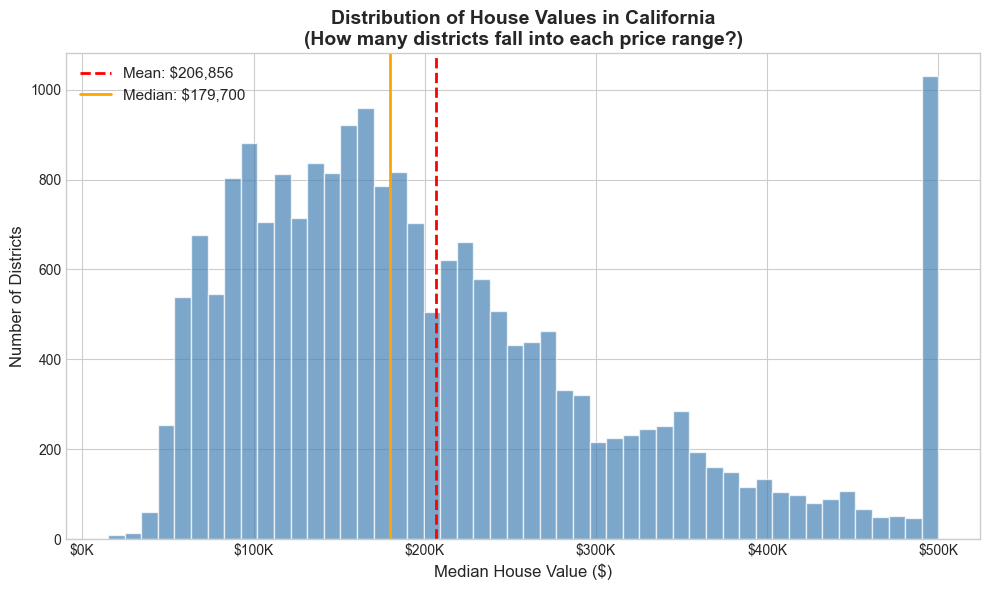


📌 KEY INSIGHT:
   Most house values cluster between $100K-$250K.
   The spike at $500K indicates a "cap" in the data (maximum recorded value).



In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
ax.hist(df['MedHouseVal'] * 100000, bins=50, color='steelblue', edgecolor='white', alpha=0.7)

# Add mean and median lines
mean_val = df['MedHouseVal'].mean() * 100000
median_val = df['MedHouseVal'].median() * 100000
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:,.0f}')
ax.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Median: ${median_val:,.0f}')

ax.set_xlabel('Median House Value ($)', fontsize=12)
ax.set_ylabel('Number of Districts', fontsize=12)
ax.set_title('Distribution of House Values in California\n(How many districts fall into each price range?)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)

# Format x-axis as currency
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("""
📌 KEY INSIGHT:
   Most house values cluster between $100K-$250K.
   The spike at $500K indicates a "cap" in the data (maximum recorded value).
""")

### 4.2 How Is Income Distributed Across California?

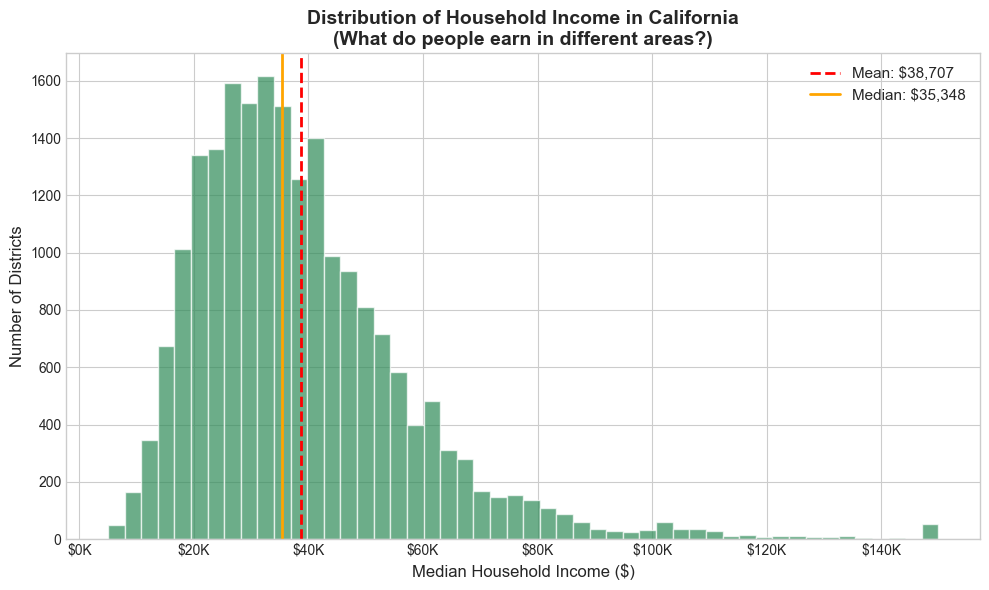


📌 KEY INSIGHT:
   Most households earn between $20K-$60K annually.
   There's a long tail of higher-income areas (up to $150K+).



In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['MedInc'] * 10000, bins=50, color='seagreen', edgecolor='white', alpha=0.7)

mean_inc = df['MedInc'].mean() * 10000
median_inc = df['MedInc'].median() * 10000
ax.axvline(mean_inc, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_inc:,.0f}')
ax.axvline(median_inc, color='orange', linestyle='-', linewidth=2, label=f'Median: ${median_inc:,.0f}')

ax.set_xlabel('Median Household Income ($)', fontsize=12)
ax.set_ylabel('Number of Districts', fontsize=12)
ax.set_title('Distribution of Household Income in California\n(What do people earn in different areas?)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print("""
📌 KEY INSIGHT:
   Most households earn between $20K-$60K annually.
   There's a long tail of higher-income areas (up to $150K+).
""")

---
### 4.3 The Most Important Relationship: Income vs House Value

This is the key question: **Does higher income mean higher house prices?**

---

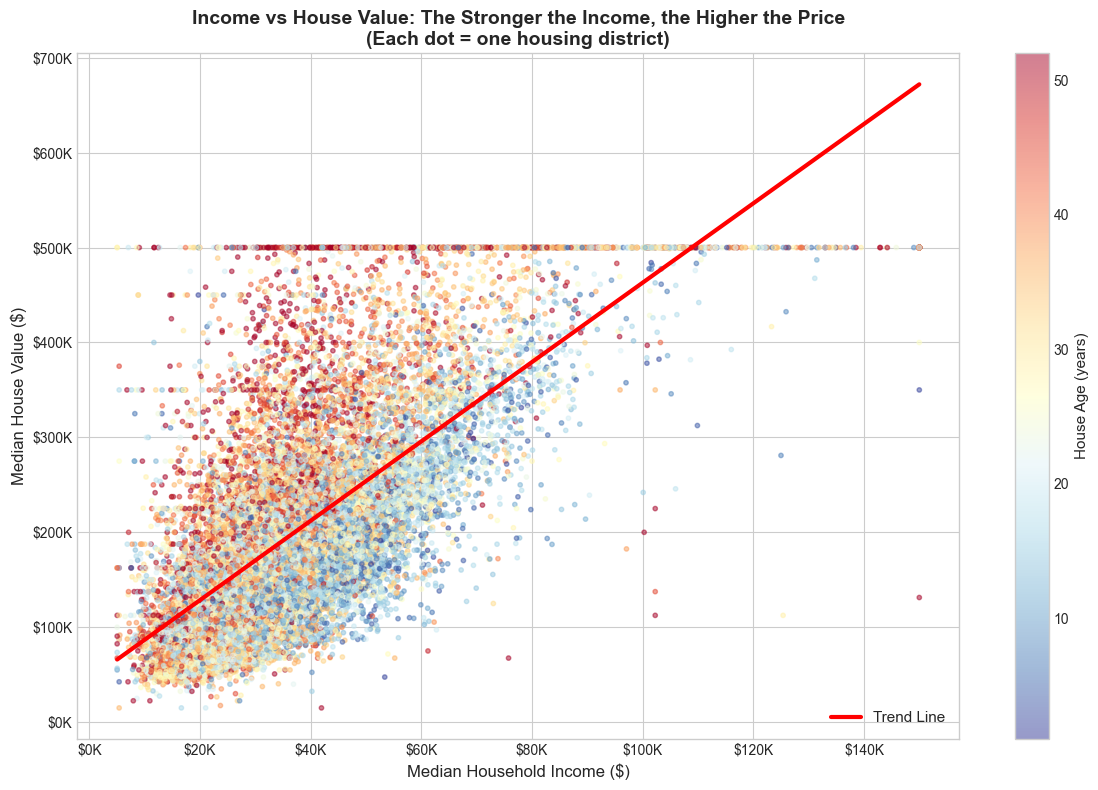


📌 KEY INSIGHT - THIS IS THE MOST IMPORTANT FINDING!

   Correlation: 0.69 (Strong Positive Relationship)

   ✅ Income is the #1 predictor of house value.
   ✅ Higher income areas = Higher house prices
   ✅ This relationship is very consistent across California



In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with color based on house age
scatter = ax.scatter(df['MedInc'] * 10000, 
                     df['MedHouseVal'] * 100000,
                     c=df['HouseAge'],
                     cmap='RdYlBu_r',
                     alpha=0.5,
                     s=10)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('House Age (years)', fontsize=11)

# Add trend line
z = np.polyfit(df['MedInc'], df['MedHouseVal'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['MedInc'].min(), df['MedInc'].max(), 100)
ax.plot(x_line * 10000, p(x_line) * 100000, 'r-', linewidth=3, label='Trend Line')

ax.set_xlabel('Median Household Income ($)', fontsize=12)
ax.set_ylabel('Median House Value ($)', fontsize=12)
ax.set_title('Income vs House Value: The Stronger the Income, the Higher the Price\n(Each dot = one housing district)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='lower right')

# Format axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['MedInc'].corr(df['MedHouseVal'])

print(f"""
📌 KEY INSIGHT - THIS IS THE MOST IMPORTANT FINDING!
   
   Correlation: {correlation:.2f} (Strong Positive Relationship)
   
   ✅ Income is the #1 predictor of house value.
   ✅ Higher income areas = Higher house prices
   ✅ This relationship is very consistent across California
""")

---
### 4.4 Where Are the Most Expensive Houses Located?

Let's see how house values are distributed geographically across California.

---

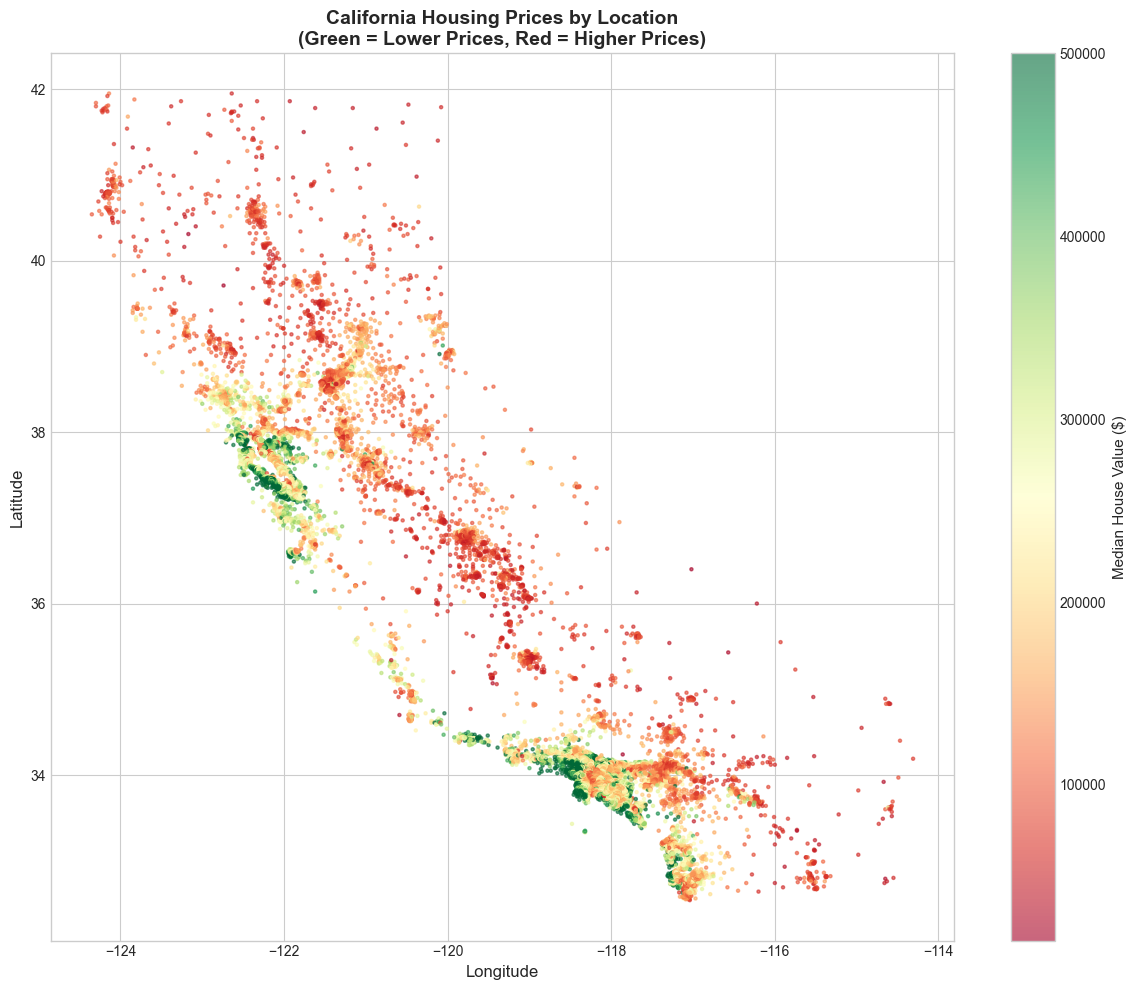


📌 KEY INSIGHT:
   ✅ Coastal areas (especially around San Francisco and Los Angeles) have higher prices
   ✅ Inland areas generally have lower housing costs
   ✅ You can clearly see California's shape and major population centers!



In [8]:
fig, ax = plt.subplots(figsize=(12, 10))

# Create scatter plot using lat/long
scatter = ax.scatter(df['Longitude'], 
                     df['Latitude'],
                     c=df['MedHouseVal'] * 100000,
                     cmap='RdYlGn',
                     alpha=0.6,
                     s=5)

cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value ($)', fontsize=11)

ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('California Housing Prices by Location\n(Green = Lower Prices, Red = Higher Prices)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("""
📌 KEY INSIGHT:
   ✅ Coastal areas (especially around San Francisco and Los Angeles) have higher prices
   ✅ Inland areas generally have lower housing costs
   ✅ You can clearly see California's shape and major population centers!
""")

---
### 4.5 Which Factors Affect House Prices the Most?

Let's create a correlation heatmap to see all relationships at once.

---

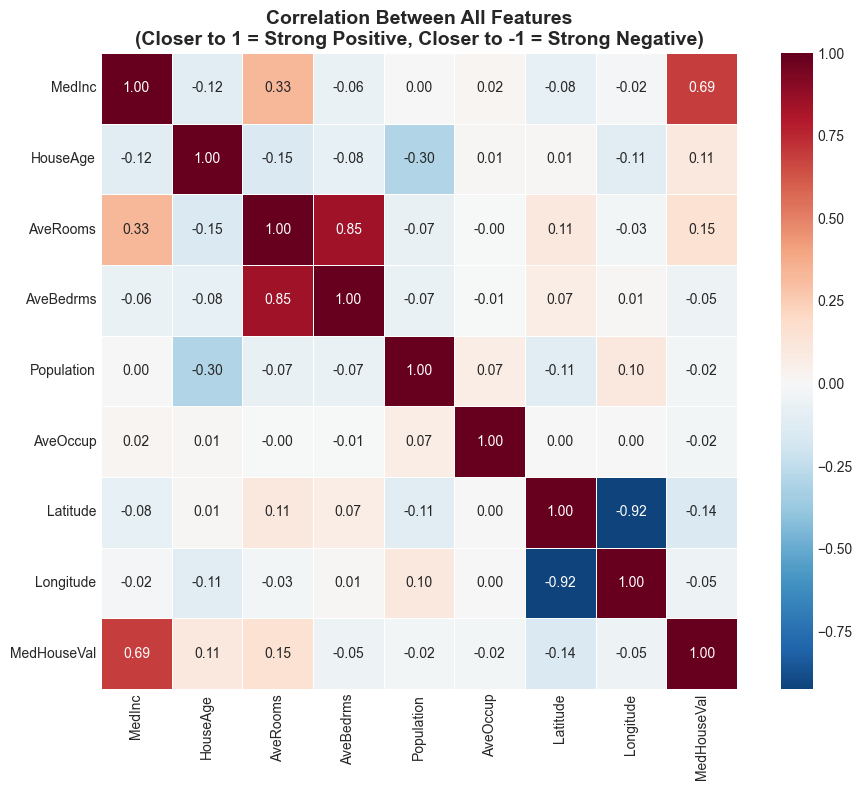

📌 FACTORS RANKED BY IMPACT ON HOUSE VALUE:
   🔴 STRONG MedInc: 0.69
   🟡 MODERATE AveRooms: 0.15
   🟡 MODERATE HouseAge: 0.11
   ⚪ WEAK AveOccup: -0.02
   ⚪ WEAK Population: -0.02
   ⚪ WEAK Longitude: -0.05
   ⚪ WEAK AveBedrms: -0.05
   🟡 MODERATE Latitude: -0.14


In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            ax=ax)

ax.set_title('Correlation Between All Features\n(Closer to 1 = Strong Positive, Closer to -1 = Strong Negative)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Get correlations with target
target_corr = corr_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(ascending=False)

print("📌 FACTORS RANKED BY IMPACT ON HOUSE VALUE:")
print("=" * 50)
for feature, corr in target_corr.items():
    if abs(corr) >= 0.3:
        impact = "🔴 STRONG"
    elif abs(corr) >= 0.1:
        impact = "🟡 MODERATE"
    else:
        impact = "⚪ WEAK"
    print(f"   {impact} {feature}: {corr:.2f}")

---
## 📋 Summary: Key Findings for Stakeholders

---

In [10]:
print("=" * 70)
print("                    📊 EXECUTIVE SUMMARY                              ")
print("                 California Housing Market Analysis                   ")
print("=" * 70)

print(f"""

🏠 DATASET OVERVIEW:
   • Analyzed {len(df):,} housing districts across California
   • Data from the 1990 U.S. Census
   • No missing values - Data quality is excellent

💰 PRICE FINDINGS:
   • Median House Value: ${df['MedHouseVal'].median() * 100000:,.0f}
   • Price Range: ${df['MedHouseVal'].min() * 100000:,.0f} - ${df['MedHouseVal'].max() * 100000:,.0f}
   • Most properties fall in the $100K-$250K range

🔑 KEY PRICE DRIVERS (Ranked by Impact):
   1. Income Level (correlation: {df['MedInc'].corr(df['MedHouseVal']):.2f}) - STRONGEST FACTOR
   2. Location (Coastal areas command premium prices)
   3. House Age (correlation: {df['HouseAge'].corr(df['MedHouseVal']):.2f})
   4. Number of Rooms (correlation: {df['AveRooms'].corr(df['MedHouseVal']):.2f})

📍 GEOGRAPHIC INSIGHTS:
   • Most expensive: Coastal California (SF Bay Area, LA)
   • Most affordable: Inland/Central California
   • Clear urban vs rural price divide

💡 RECOMMENDATIONS FOR STAKEHOLDERS:
   1. Focus on income demographics when assessing property values
   2. Coastal properties are investments with higher appreciation
   3. Inland areas offer more affordable housing options
   4. House size matters, but income level matters MORE
""")

print("=" * 70)
print("                      Analysis Complete                               ")
print("=" * 70)

                    📊 EXECUTIVE SUMMARY                              
                 California Housing Market Analysis                   


🏠 DATASET OVERVIEW:
   • Analyzed 20,640 housing districts across California
   • Data from the 1990 U.S. Census
   • No missing values - Data quality is excellent

💰 PRICE FINDINGS:
   • Median House Value: $179,700
   • Price Range: $14,999 - $500,001
   • Most properties fall in the $100K-$250K range

🔑 KEY PRICE DRIVERS (Ranked by Impact):
   1. Income Level (correlation: 0.69) - STRONGEST FACTOR
   2. Location (Coastal areas command premium prices)
   3. House Age (correlation: 0.11)
   4. Number of Rooms (correlation: 0.15)

📍 GEOGRAPHIC INSIGHTS:
   • Most expensive: Coastal California (SF Bay Area, LA)
   • Most affordable: Inland/Central California
   • Clear urban vs rural price divide

💡 RECOMMENDATIONS FOR STAKEHOLDERS:
   1. Focus on income demographics when assessing property values
   2. Coastal properties are investments with hig